# Importing libraries

In [1]:
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation

# For vizualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data pre-processing

In [20]:
#Loading File
df = pd.read_csv(r'C:\Users\racha\Desktop\Eluvio challenge\Data\Eluvio_DS_Challenge.csv',encoding='latin1')

In [3]:
#Checking for any null values
df.isnull().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

In [21]:
#Converting date into easy-to-use format
df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
df['year'] = df['date_created'].dt.year

In [22]:
#Shape of dataframe
print(" Shape of training dataframe: ", df.shape)

 Shape of training dataframe:  (509236, 9)


# Sentiment Analysis using vader

In [23]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [24]:
#Calculating scores for negative, positive and neutral sentiment of title
df['scores'] = df['title'].apply(lambda review: analyser.polarity_scores(review))

df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,scores
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp..."
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp..."
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp..."


In [25]:
#Calculating compound(threshold) from the scores
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,scores,compound
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267


In [26]:
#Determining sentiment of title based on compound
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['compound'].apply(Sentimnt)

df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,scores,compound,Sentiment
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705,Negative
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939,Positive
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267,Negative


# Analysis

1) The plot below shows the number of videos created in each sentiment type
Since there are more in Negative side, it clearly shows that things were not going well in the world during those years.

Text(0.5, 1.0, 'Total number of videos in each sentiment type')

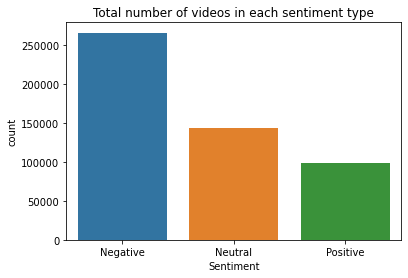

In [27]:
sns.countplot(x='Sentiment',data=df).set_title("Total number of videos in each sentiment type")

In [28]:
#Asking author name for further analysis 
Author_name = input("Enter the name of the author : ")

Enter the name of the author : polar


In [29]:
#Creating a dataframe based on author name
rslt_df = df[df['author'] == Author_name]
rslt_df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,scores,compound,Sentiment
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,"{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705,Negative
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3350,1207796047,2008-04-10,1,0,Burmese migrants choke in lorry,False,polar,worldnews,2008,"{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp...",-0.5423,Negative
3425,1207866924,2008-04-10,1,0,Diplomats renew UN reform push,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4144,1208571849,2008-04-19,4,0,Bolivia sees rise in mob justice,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.5267,Positive
4257,1208728867,2008-04-20,5,0,"Nepal says it is prepared to use force, includ...",False,polar,worldnews,2008,"{'neg': 0.101, 'neu': 0.798, 'pos': 0.101, 'co...",0.0000,Neutral
5478,1209920434,2008-05-04,1,0,Somalis protest against US strike,False,polar,worldnews,2008,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",-0.3612,Negative
5592,1210003981,2008-05-05,0,0,Babies bodies in German freezer,False,polar,worldnews,2008,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5677,1210096394,2008-05-06,0,0,EU sues Italy over rubbish crisis,False,polar,worldnews,2008,"{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'comp...",-0.6249,Negative


2) Plot below shows the number of videos created by the author in each sentiment type
The plot clearly depicts that the author is more inclined towards creating neutral content inspite of what is happening around the world.
This plot will show work of different authors as the name is entered above.

Text(0.5, 1.0, 'Number of videos created by the author in different category')

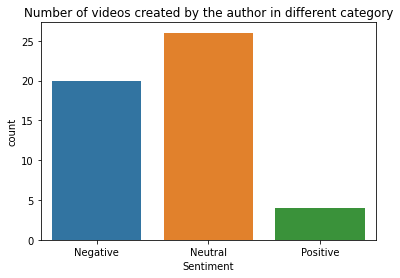

In [30]:
sns.countplot(x='Sentiment',data=rslt_df).set_title("Number of videos created by the author in different category")

In [31]:
#Getting a count of total number of up_votes for each category
if 'Negative' in rslt_df.values:
    neg = rslt_df.groupby('Sentiment')['up_votes'].sum()['Negative']
else:
    neg = 0
    print("No videos corresponding to Negative sentiment")
    
if 'Neutral' in rslt_df.values:
    neu = rslt_df.groupby('Sentiment')['up_votes'].sum()['Neutral']
else: 
    neu = 0
    print("No videos corresponding to Neutral sentiment")
    
if 'Positive' in rslt_df.values:
    pos = rslt_df.groupby('Sentiment')['up_votes'].sum()['Positive']
else: 
    pos = 0
    print("No videos corresponding to Positive sentiment")


3) The plot below shows total number of likes gained by the the author in each category of video
This plot will help the author determine how well his/her is being appreciated in different categories

Text(0, 0.5, 'count of up_votes')

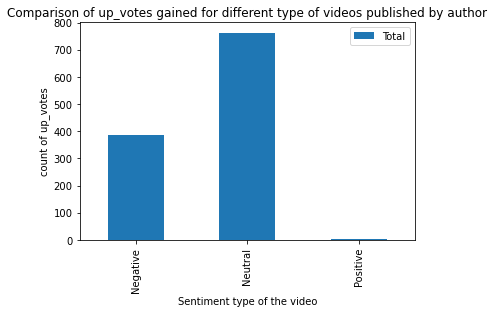

In [32]:
plotdata = pd.DataFrame({"Total": [neg,neu,pos]},index=["Negative", "Neutral","Positive"])
plotdata.plot(kind="bar", title="test")
plt.title("Comparison of up_votes gained for different type of videos published by author")
plt.xlabel("Sentiment type of the video")
plt.ylabel("count of up_votes")

4) The plot below shows different type of videos released in following years
This plot depicts that during years 2013 through 2016 there were comparatively more videos created  that too following negative sentiment. 

Text(0.5, 1.0, 'Different type of videos created in following years')

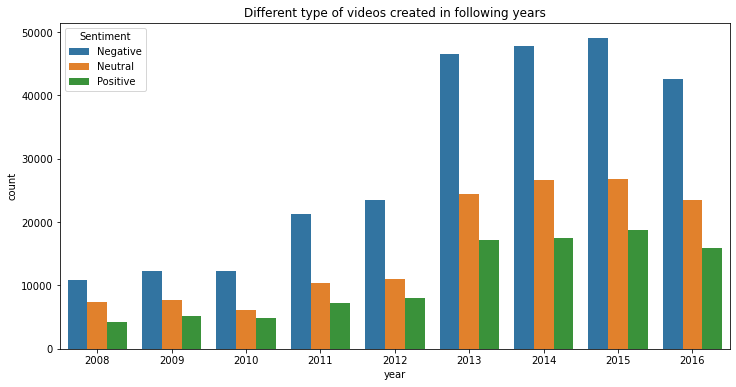

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='year',hue = 'Sentiment',data=df).set_title("Different type of videos created in following years")